# Classificação com o dataset Olivetti Faces

In [18]:
pip install lightgbm

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.4 MB 653.6 kB/s eta 0:00:03
   -- ------------------------------------- 0.1/1.4 MB 871.5 kB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.4 MB 726.2 kB/s eta 0:00:02
   ---- ----------------------------------- 0.2/1.4 MB 893.0 kB/s eta 0:00:02
   ---- ----------------------------------- 0.2/1.4 MB 893.0 kB/s eta 0:00:02
   ---- ----------------------------------- 0.2/1.4 MB 893.0 kB/s eta 0:00:02
   -------- ------------------------------- 0.3/1.4 MB 905.4 kB/s eta 0:00:02
   ------------ --------------------------- 0.4/1.4 MB 1.1 MB/s eta 0:00:01
   ---------------- ----------------------- 0.6/1.4 MB 1.4 MB/s eta 0:00:01
   ------------------- -------------------- 0.7/1.4 MB 1.4 MB/s eta 0:00:01
   ------------------------- -------------- 0.9/1.4 MB 1.7 MB/s eta 0:00:01
   ---------


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
import matplotlib.pyplot as plt
import lightgbm as lgb
import numpy as np
import pandas as pd
import warnings
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.exceptions import UndefinedMetricWarning

# Ignorando avisos de métricas indefinidas
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
warnings.filterwarnings("ignore", category=UserWarning)

## Carregando e Visualizando o dataset Olivetti Faces

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\tamir\scikit_learn_data


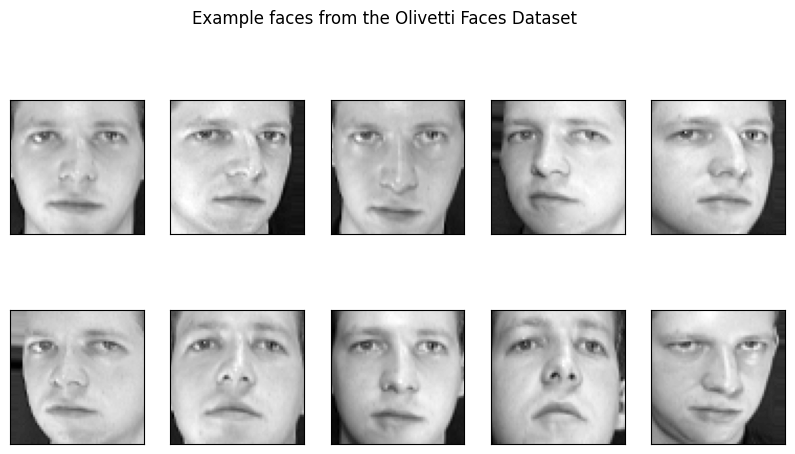

In [8]:
# Carregando o dataset Olivetti Faces
faces = fetch_olivetti_faces()
X, y = faces.data, faces.target

# Visualização de algumas faces do dataset
fig, axes = plt.subplots(2, 5, figsize=(10, 5), subplot_kw={"xticks": [], "yticks": []})
for i, ax in enumerate(axes.flat):
    ax. imshow(faces. images[i], cmap="gray")
plt. suptitle("Example faces from the Olivetti Faces Dataset", y=1.02)
plt.show()

## Dividindo o dataset em treino e teste

In [9]:
#+Dividindo o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# stratify=y: melhora o desbalanceamento dos dados

## Treinando e avaliando modelos de classificação

### KNN

In [10]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print('KNN Classification Report: ')
print(classification_report(y_test, y_pred_knn))
# tendencia de fazer overfitting muito facil
# precision: quanto eu acertei

KNN Classification Report: 
              precision    recall  f1-score   support

           0       0.50      0.67      0.57         3
           1       1.00      1.00      1.00         3
           2       0.60      1.00      0.75         3
           3       0.50      0.67      0.57         3
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       0.75      1.00      0.86         3
           8       0.75      1.00      0.86         3
           9       1.00      0.33      0.50         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       0.50      1.00      0.67         3
          13       1.00      1.00      1.00         3
          14       0.75      1.00      0.86         3
          15       1.00      0.33      0.50         3
          16       1.00      0.67      0.80         3

### SVM

In [11]:
svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      0.67      0.80         3
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       0.75      1.00      0.86         3
           8       1.00      1.00      1.00         3
           9       1.00      0.33      0.50         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       1.00      0.67      0.80         3


### Decision Tree

In [12]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.00      0.00      0.00         3
           2       0.50      1.00      0.67         3
           3       0.00      0.00      0.00         3
           4       0.17      0.33      0.22         3
           5       1.00      0.67      0.80         3
           6       0.67      0.67      0.67         3
           7       1.00      0.33      0.50         3
           8       0.33      0.67      0.44         3
           9       0.33      0.33      0.33         3
          10       1.00      0.33      0.50         3
          11       0.67      0.67      0.67         3
          12       0.50      0.33      0.40         3
          13       1.00      0.33      0.50         3
          14       1.00      0.67      0.80         3
          15       0.30      1.00      0.46         3
          16       0.50      0.33      0.40 

### Random Forest

In [15]:
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)
print ("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_forest))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      0.67      0.80         3
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      0.33      0.50         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      0.33      0.50         3
          13       1.00      1.00      1.00         3
          14       0.75      1.00      0.86         3
          15       1.00      1.00      1.00         3
          16       0.75      1.00      0.86 

### Gradient Boosting

In [20]:
lgbm = lgb.LGBMClassifier(random_state=42, verbose =- 1)

lgbm.fit(X_train, y_train)

# Use the best model to make predictions
y_pred_lgbm = lgbm.predict(X_test)
print("LightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgbm))

LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       0.75      1.00      0.86         3
           4       0.67      0.67      0.67         3
           5       0.75      1.00      0.86         3
           6       1.00      0.67      0.80         3
           7       1.00      0.67      0.80         3
           8       1.00      0.67      0.80         3
           9       0.50      0.33      0.40         3
          10       0.67      0.67      0.67         3
          11       1.00      1.00      1.00         3
          12       0.50      0.33      0.40         3
          13       1.00      1.00      1.00         3
          14       0.60      1.00      0.75         3
          15       0.67      0.67      0.67         3
          16       0.75      1.00      0.86      

## K-Means (para clustering, não classificação)

In [21]:
# Since KMeans clustering doesn't directly provide class labels, we need to map clusters to the true labels
# Here we assume that the mode of true labels within each cluster is the predicted label for that cluster

def map_clusters_to_labels(y_true, y_pred, n_clusters):
    labels = np.zeros(n_clusters)
    for i in range(n_clusters):
        mask = y_pred == i
        if np.sum(mask) == 0:
            labels[i] = -1
        else:
            labels[i] = np.bincount(y_true[mask]).argmax()
    return labels



* *A função pega os clusters gerados por um algoritmo de clustering e encontra o rótulo verdadeiro mais frequente dentro de cada cluster. Isso permite que você interprete os clusters em termos das classes reais dos seus dados.*

In [22]:
# Kmeans (para clustering, não classificação)
kmeans = KMeans(n_clusters=40, random_state=42)
kmeans. fit(X)

# Predict cluster assignments for the test data
y_pred_kmeans = kmeans.predict(X_test)

# Map cluster assignments to class labels
cluster_labels = map_clusters_to_labels(y_test, y_pred_kmeans, 40)
y_pred_mapped = cluster_labels[y_pred_kmeans]

# Print the classification report
print("KMeans Clustering Classification Report:")
print(classification_report(y_test, y_pred_mapped))

KMeans Clustering Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.67      0.50         3
           1       0.75      1.00      0.86         3
           2       0.25      0.33      0.29         3
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         3
           5       1.00      0.67      0.80         3
           6       1.00      0.67      0.80         3
           7       0.75      1.00      0.86         3
           8       0.43      1.00      0.60         3
           9       1.00      0.33      0.50         3
          10       1.00      1.00      1.00         3
          11       1.00      0.33      0.50         3
          12       0.40      0.67      0.50         3
          13       1.00      1.00      1.00         3
          14       0.43      1.00      0.60         3
          15       0.60      1.00      0.75         3
          16       0.33      0.67      0

## Validação Cruzada e Pipeline no SKlearn

In [24]:
pipeline = Pipeline([("scaler", StandardScaler()), ("svc", SVC())])
cross_val_scores = cross_val_score(pipeline, X, y, cv=5)
print("Cross-Validation Scores:", cross_val_scores)

Cross-Validation Scores: [1.     0.9375 0.95   0.9375 0.9125]


## Imprimindo imagens reais vs Preditas para todos os modelos

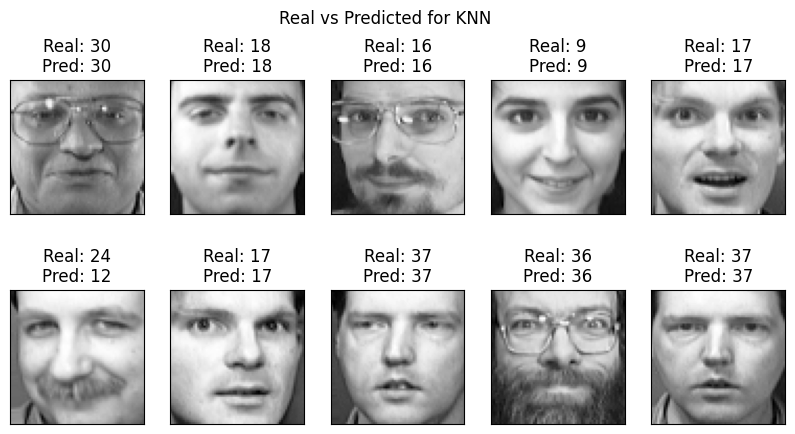

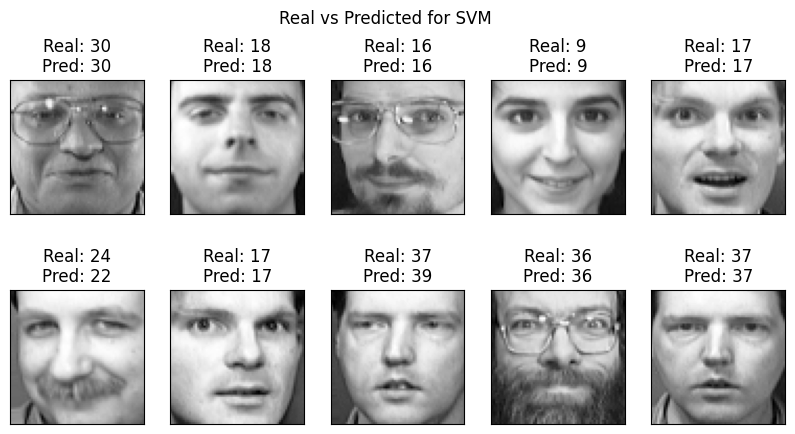

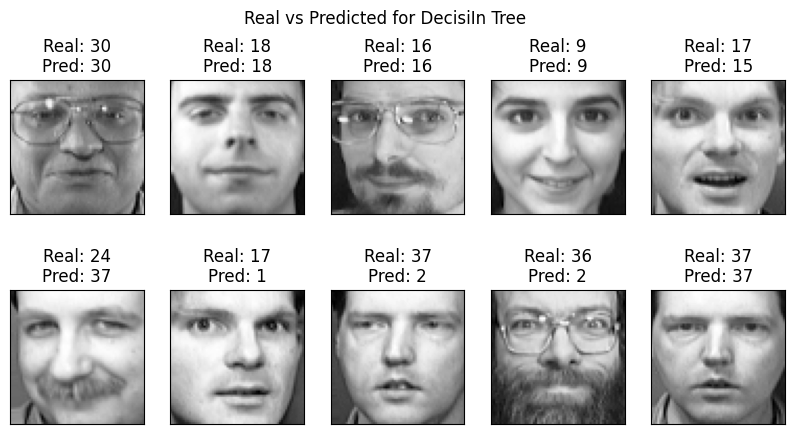

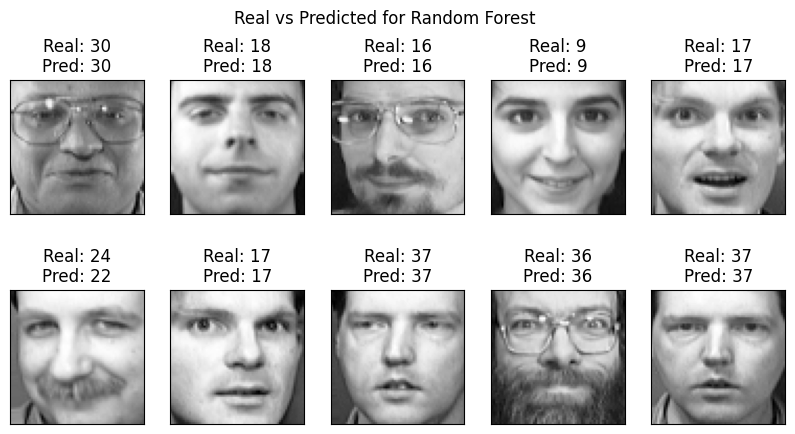

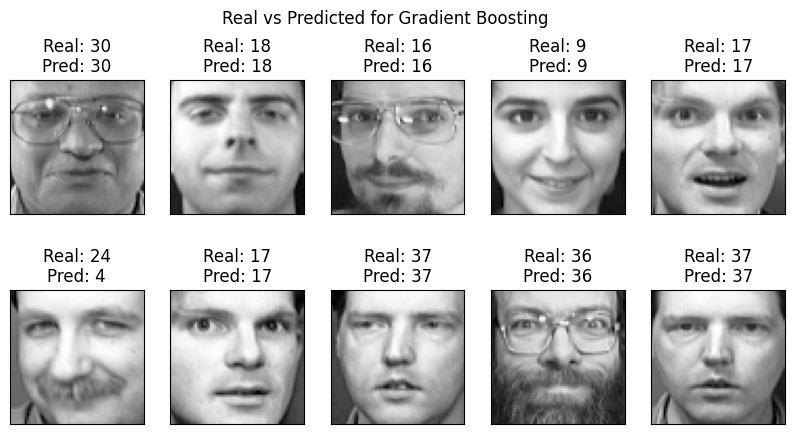

In [25]:
# Definindo modelos novamente para evitar erro NameError

models = {
"KNN": knn,
"SVM": svm,
"DecisiIn Tree": tree,
"Random Forest": forest,
"Gradient Boosting": lgbm,
}

# Imprimindo imagens reais vs preditas para todos os modelos

for name, model in models.items ():
    y_pred = model.predict(X_test)
    fig, axes = plt.subplots(
        2, 5, figsize=(10, 5), subplot_kw={"xticks": [], "yticks": []}
    )

    fig. suptitle(f"Real vs Predicted for {name}")
    for i, ax in enumerate(axes.flat):
        ax. imshow(X_test[i].reshape(64, 64), cmap="gray")
        ax. set_title(f"Real: {y_test[i]}\nPred: {y_pred[i]}")
    plt. show()

## Comparando o desempenho dos modelos

In [28]:
# Comparando o desempenho dos modelos
performance = pd.DataFrame(
    columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"]
)

for name, model in models.items():
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    performance. loc[performance. shape[0]] = {
        "Model": name,
        "Accuracy": report["accuracy"],
        "Precision": report["weighted avg"]["precision"],
        "Recall": report["weighted avg"]["recall"],
        "F1-Score": report["weighted avg"]["f1-score"],
    }

performance. set_index("Model", inplace=True)
performance = performance.map(lambda x: f"{100 * x:2.2f} %")
performance. sort_values("F1-Score", ascending=False, inplace=True)

performance

,Accuracy,Precision,Recall,F1-Score
Model,,,,
SVM,93.33 %,96.07 %,93.33 %,93.32 %
Random Forest,93.33 %,96.07 %,93.33 %,93.07 %
KNN,85.83 %,89.00 %,85.83 %,85.15 %
Gradient Boosting,80.00 %,83.71 %,80.00 %,79.01 %
DecisiIn Tree,56.67 %,62.63 %,56.67 %,56.33 %
